In [246]:
import warnings
warnings.filterwarnings("ignore")

In [247]:
import pickle

In [248]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from pylab import xticks,yticks,np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [249]:
df = pd.read_csv("../data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [250]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [251]:
print('data dimensions:',df.shape)

data dimensions: (1599, 12)


In [252]:
df.describe().round(2).T[:]

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


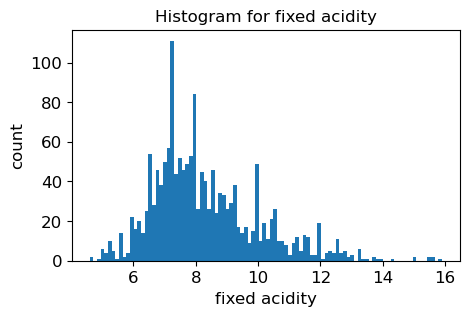

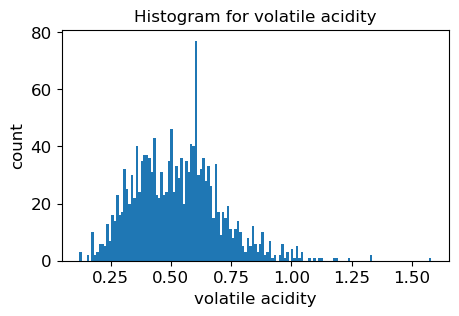

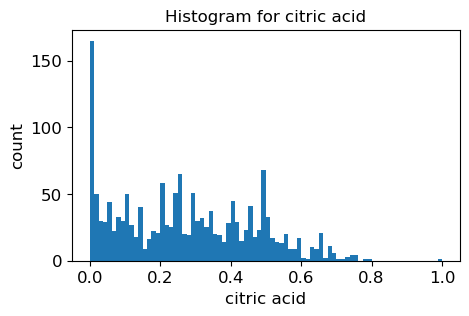

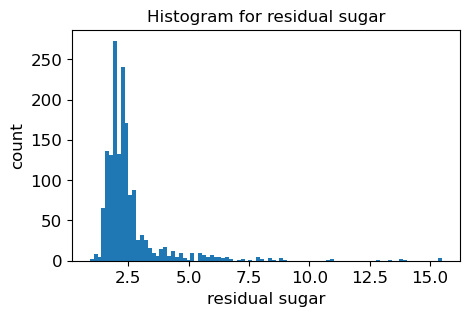

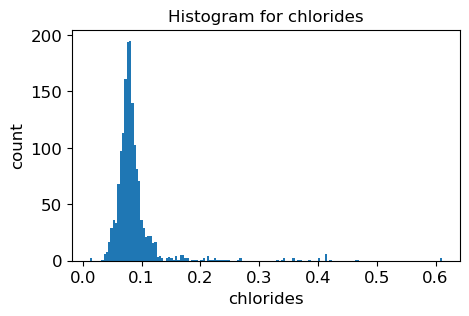

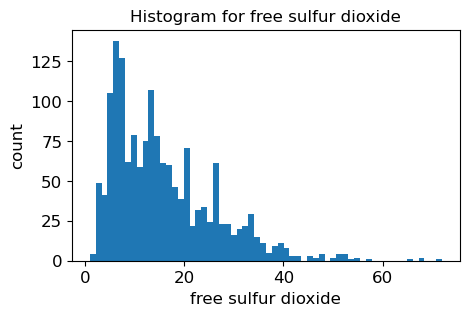

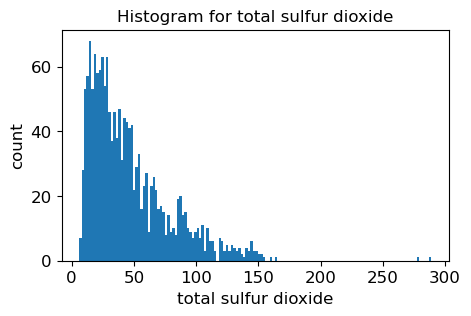

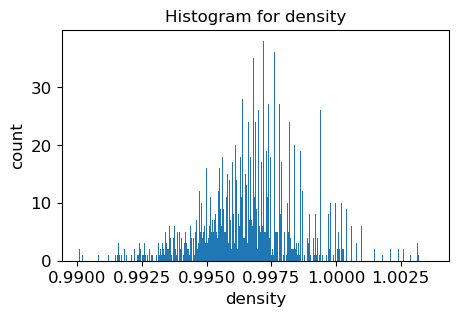

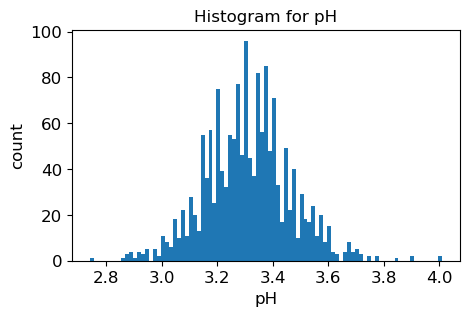

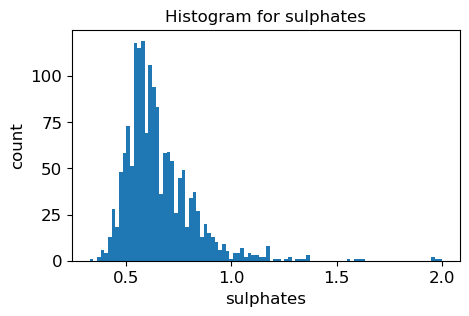

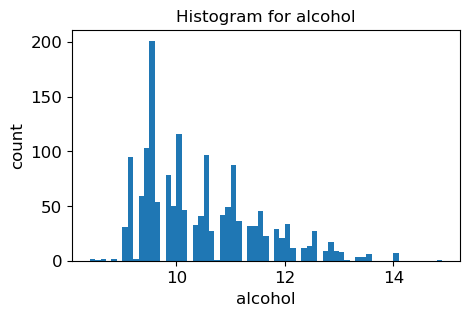

In [253]:
for i in range(11):
    plt.figure(figsize=(5,3))
    df[df.columns[i]].plot.hist(bins = df[df.columns[i]].nunique())   # bins = int(np.sqrt(df.shape[0])) 
    plt.xlabel(str(df.columns[i]),fontsize=12)
    plt.ylabel('count',fontsize=12)
    plt.title("Histogram for " + df.columns[i],fontsize=12)
    plt.show()

In [254]:
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [255]:
correct_order = [3,4,5,6,7,8]
df['quality'].value_counts().reindex(correct_order)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [256]:
df['quality'].value_counts(normalize=True).reindex(correct_order).round(4)

3    0.0063
4    0.0331
5    0.4259
6    0.3990
7    0.1245
8    0.0113
Name: quality, dtype: float64

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [258]:
print("Number of missing values:")
df.isna().sum()

Number of missing values:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

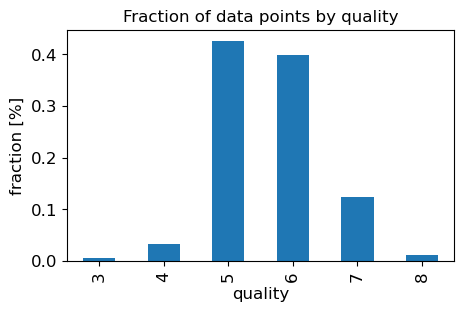

In [259]:
plt.figure(figsize=(5,3))
pd.value_counts(df['quality'],normalize=True).reindex(correct_order).plot.bar()
plt.title("Fraction of data points by quality", fontsize=12)
plt.ylabel('fraction [%]', fontsize=12)
plt.xlabel("quality", fontsize=12)
plt.savefig("../figures/Fraction of data points by quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [260]:
X = df.iloc[:,:11]
y = df.iloc[:,11:]

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [261]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [262]:
corrWithY = df.corrwith(df["quality"])
corrWithY

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

In [118]:
# Top 5 features correlated with target variable quality: alcohol, volatile acidity, sulphates, citric acid, total sulfur dioxide
print("Linear correlation between each feature")
print("and target variable (quality):")
corrWithY.sort_values().round(4)

Linear correlation between each feature
and target variable (quality):


volatile acidity       -0.3906
total sulfur dioxide   -0.1851
density                -0.1749
chlorides              -0.1289
pH                     -0.0577
free sulfur dioxide    -0.0507
residual sugar          0.0137
fixed acidity           0.1241
citric acid             0.2264
sulphates               0.2514
alcohol                 0.4762
quality                 1.0000
dtype: float64

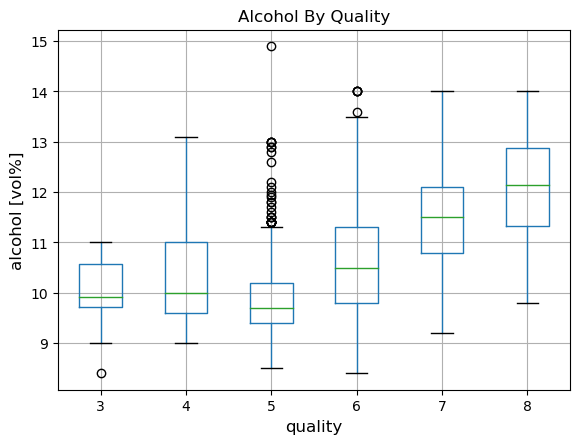

In [119]:
df[['alcohol','quality']].boxplot(by='quality')
plt.xlabel('quality', fontsize=12)
plt.ylabel('alcohol [vol%]', fontsize=12)
plt.title("Alcohol By Quality", fontsize=12)
plt.suptitle('')
plt.savefig("../figures/Alcohol By Quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

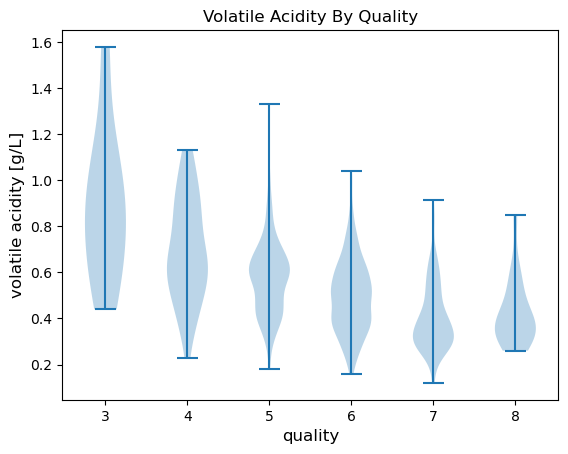

In [120]:
dataset = [df[df['quality']==3]['volatile acidity'].values,
           df[df['quality']==4]['volatile acidity'].values,
           df[df['quality']==5]['volatile acidity'].values,
           df[df['quality']==6]['volatile acidity'].values,
           df[df['quality']==7]['volatile acidity'].values,
           df[df['quality']==8]['volatile acidity'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],[3,4,5,6,7,8])
plt.xlabel("quality", fontsize=12)
plt.ylabel('volatile acidity [g/L]', fontsize=12)
plt.title("Volatile Acidity By Quality", fontsize=12)
plt.savefig("../figures/Volatile Acidity By Quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

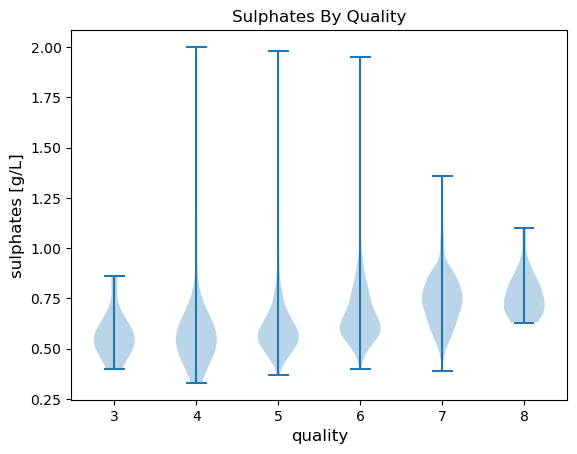

In [121]:
dataset = [df[df['quality']==3]['sulphates'].values,
           df[df['quality']==4]['sulphates'].values,
           df[df['quality']==5]['sulphates'].values,
           df[df['quality']==6]['sulphates'].values,
           df[df['quality']==7]['sulphates'].values,
           df[df['quality']==8]['sulphates'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],[3,4,5,6,7,8])
plt.xlabel("quality", fontsize=12)
plt.ylabel('sulphates [g/L]', fontsize=12)
plt.title("Sulphates By Quality", fontsize=12)
plt.savefig("../figures/Sulphates By Quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

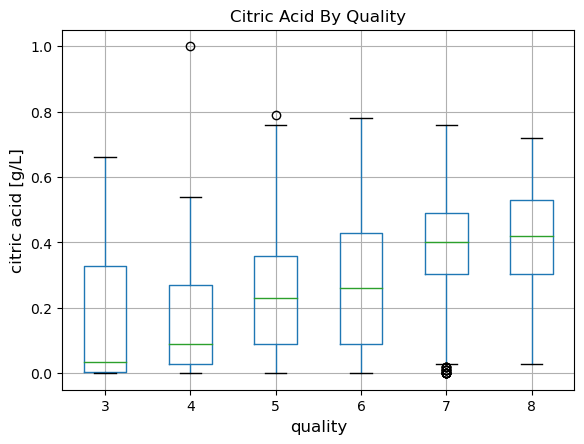

In [122]:
df[['citric acid','quality']].boxplot(by='quality')
plt.ylabel('citric acid [g/L]', fontsize=12)
plt.xlabel("quality", fontsize=12)
plt.title("Citric Acid By Quality", fontsize=12)
plt.suptitle('')
plt.savefig("../figures/Citric Acid By Quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

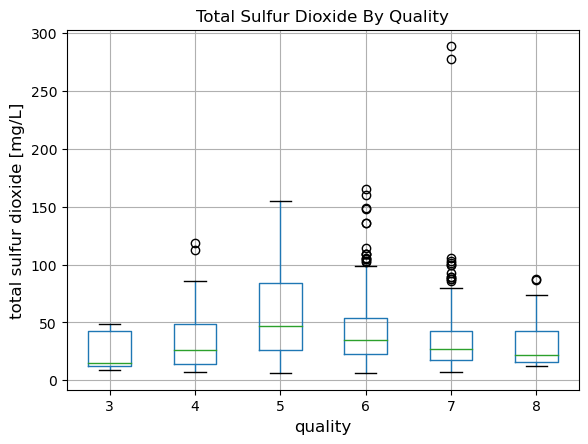

In [123]:
df[['total sulfur dioxide','quality']].boxplot(by='quality')
plt.ylabel('total sulfur dioxide [mg/L]', fontsize=12)
plt.xlabel("quality", fontsize=12)
plt.title("Total Sulfur Dioxide By Quality", fontsize=12)
plt.suptitle('')
plt.savefig("../figures/Total Sulfur Dioxide By Quality.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [124]:
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(666)

In [125]:
# linear correlation

f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)

# Answer: the top 5 most important features: 

f score [2.49600375e+01 2.87444450e+02 8.62577262e+01 3.01183699e-01
 2.69856084e+01 4.10850227e+00 5.66578176e+01 5.04052231e+01
 5.34046221e+00 1.07740433e+02 4.68267011e+02]
p values [6.49563501e-07 2.05171481e-59 4.99129525e-20 5.83218013e-01
 2.31338265e-07 4.28339795e-02 8.62170342e-14 1.87495665e-12
 2.09627787e-02 1.80208845e-24 2.83147697e-91]


In [126]:
from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(f_regression,k=5)
X_f = f_select.fit_transform(X,y)
# plt.scatter(X_f,y,edgecolor='k')
# plt.show()
# the features selected:
top5FScore = f_select.get_support()
print(top5FScore)

[False  True  True False False False  True False False  True  True]


In [127]:
f_test[top5FScore]

array([287.44444971,  86.2577262 ,  56.65781756, 107.74043302,
       468.26701064])

In [128]:
X.columns[top5FScore]

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [129]:
top5 = np.sort(f_test[top5FScore])
top5

array([ 56.65781756,  86.2577262 , 107.74043302, 287.44444971,
       468.26701064])

In [130]:
top5Col = X.columns[top5FScore][np.argsort(f_test[top5FScore])]
top5Col

Index(['total sulfur dioxide', 'citric acid', 'sulphates', 'volatile acidity',
       'alcohol'],
      dtype='object')

In [131]:
pear_corr = X.corr()
pear_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


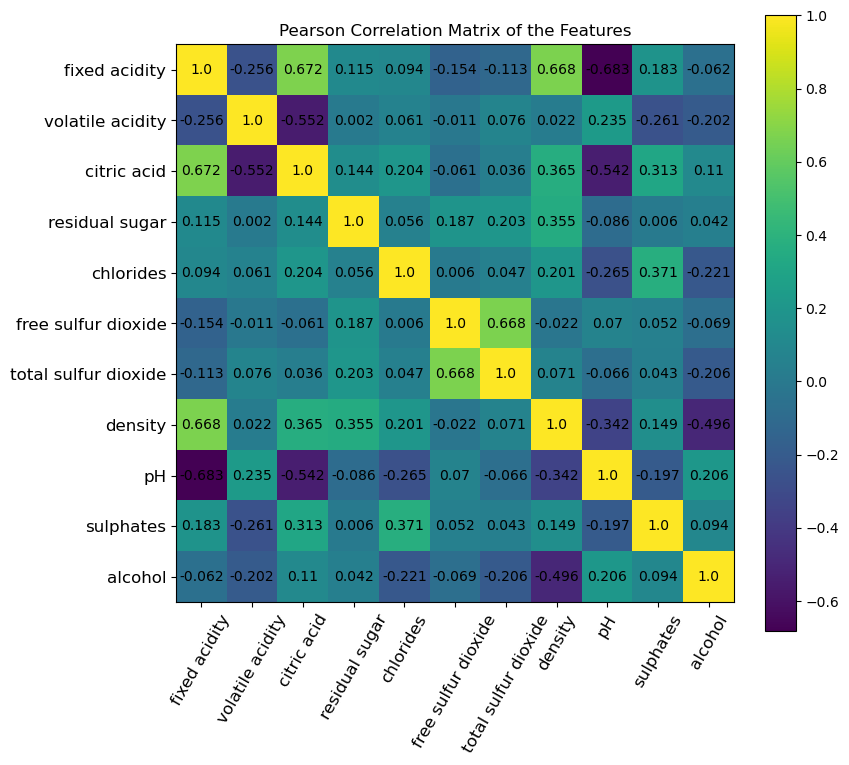

In [132]:


# visualize the correlation matrix as a heatmap

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

xticks(np.linspace(0,10,11,endpoint=True))
yticks(np.linspace(0,10,11,endpoint=True))

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(X.columns, rotation=60, fontsize=12)
ax.set_yticklabels(X.columns, rotation=0, fontsize=12)

# Loop over data dimensions and create text annotations
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 3),
                       ha="center", va="center", color="black",fontsize=10)

plt.title("Pearson Correlation Matrix of the Features", fontsize=12)
plt.savefig("../figures/Pearson Correlation Matrix of the Features.jpg", dpi=300, bbox_inches='tight')
plt.show()

# fixed acidity and pH are highly correlated
# fixed acidity and citric acid are highly correlated
# fixed acidity and density are highly correlated
# free sulfur dioxide and total sulfur dioxide are highly correlated

<Figure size 500x300 with 0 Axes>

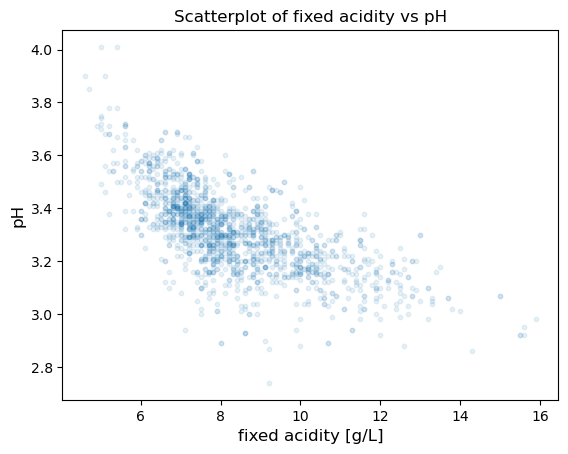

In [133]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','pH',s=10,alpha=0.1) # alpha=0.1,s=10
plt.xlabel("fixed acidity [g/L]", fontsize=12)
plt.ylabel("pH", fontsize=12)
plt.title("Scatterplot of fixed acidity vs pH", fontsize=12)
plt.savefig("../figures/Scatterplot of fixed acidity vs pH.jpg", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 500x300 with 0 Axes>

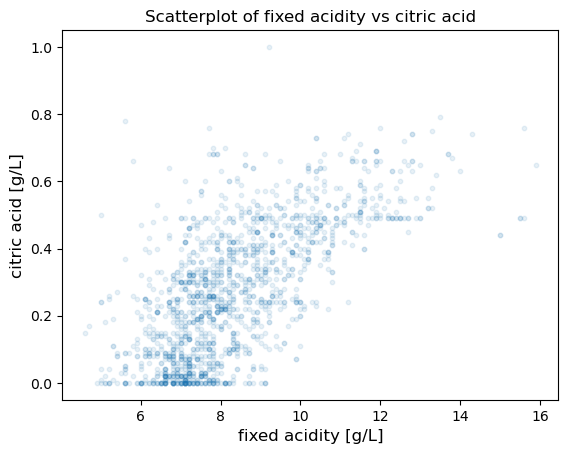

In [134]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','citric acid',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of fixed acidity vs citric acid", fontsize=12)
plt.xlabel("fixed acidity [g/L]", fontsize=12)
plt.ylabel("citric acid [g/L]", fontsize=12)
plt.savefig("../figures/Scatterplot of fixed acidity vs citric acid.jpg", dpi=300, bbox_inches='tight')

plt.show()

<Figure size 500x300 with 0 Axes>

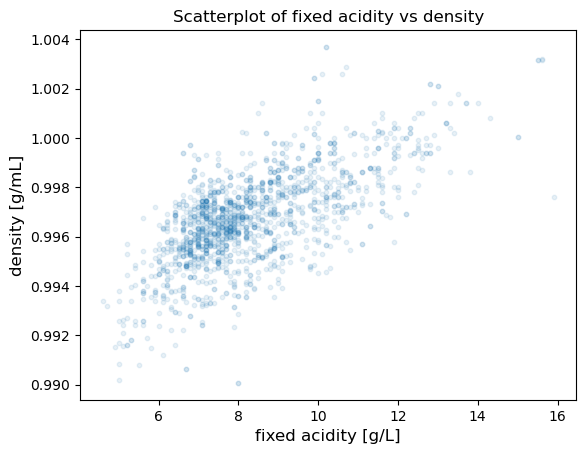

In [135]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','density',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of fixed acidity vs density", fontsize=12)
plt.xlabel("fixed acidity [g/L]", fontsize=12)
plt.ylabel("density [g/mL]", fontsize=12)
plt.savefig("../figures/Scatterplot of fixed acidity vs density.jpg", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 500x300 with 0 Axes>

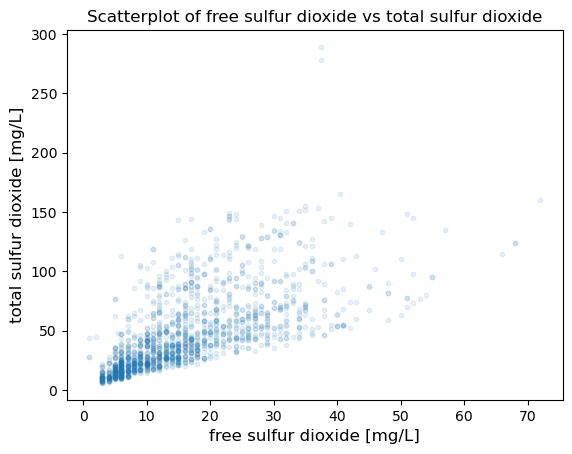

In [136]:
plt.figure(figsize=(5,3))
df.plot.scatter('free sulfur dioxide','total sulfur dioxide',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of free sulfur dioxide vs total sulfur dioxide", fontsize=12)
plt.xlabel("free sulfur dioxide [mg/L]", fontsize=12)
plt.ylabel("total sulfur dioxide [mg/L]", fontsize=12)
plt.savefig("../figures/Scatterplot of free sulfur dioxide vs total sulfur dioxide.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [137]:
# Feature engineering
# https://github.com/BrownDSI/DATA1030-Fall2022/blob/main/week4%20-%20misc%20topics/misc_topics.ipynb


In [210]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost

In [263]:
# collect which encoder to use on each feature
# needs to be done manually
minmax_ftrs = ['pH','alcohol']
std_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

In [140]:
nr_states = 10
rs = 88  # for random_state use

In [187]:
saved = {'model':[], 'X_test':[],'y_test':[],'y_test_pred':[]}

In [188]:
# a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), 
# an initialized ML algorithm, and a correspondig parameter grid as inputs

# The splitting strategy and the evaluation metric are not inputs to this function but predefined.

def MLpipe_StraKFold_RMSE(X, y, preprocessor, ML_algo, param_grid, rs):
#     warnings.filterwarnings("ignore")

    
    baseline_test_scores = []
    test_scores = []
    best_models = []
    
    # Repeat this 10 times for 10 different random states.
    for i in range(nr_states):
        np.random.seed(rs*i)
        
        # split the data to other and test (80-20) and then use KFold with 4 folds.
        # first, split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2)  # , random_state=rs*i

        # second, kfold splitter for other
        kf = StratifiedKFold(n_splits=4, shuffle=True)  #, random_state=rs*i
        
        # the classifier
        if ML_algo==RandomForestRegressor:
            model = ML_algo(random_state=rs*i)
        elif ML_algo==KNeighborsRegressor:
            model = ML_algo()
        else:
            model = ML_algo(max_iter=100000000)   # initialize the model   # random_state = rs*i, 

        # put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor, model)
        
#         print(pipe.get_params().keys())

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                            cv=kf, return_train_score=True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
#         print(results)

        
        # calculate baseline test scores
        # version 1:
        y_test_mean = np.ones((y_test.shape)) * np.array(np.mean(y_test))
        baseline_test_score = np.sqrt(mean_squared_error(y_test,y_test_mean))
        print("baseline test score:", baseline_test_score)
        baseline_test_scores.append(baseline_test_score)
        
        # version 2: https://www.yourdatateacher.com/2022/07/04/does-your-model-beat-the-baseline/
#         y_train_mean = np.ones((y_test.shape)) * np.array(np.mean(y_train))
#         baseline_test_score = np.sqrt(mean_squared_error(y_test,y_train_mean))
#         print("baseline test score:", baseline_test_score)
#         baseline_test_scores.append(baseline_test_score)
        

        print('best model parameters:', grid.best_params_)
        print('validation score:', -grid.best_score_) # this is the mean validation score over all iterations
        
        # save the best model
        best_models.append(grid.best_estimator_)
        
#         print("===grid===")
#         print(grid)
#         print("===grid.best_estimator_===")
#         print(grid.best_estimator_)
        
        y_test_pred = best_models[-1].predict(X_test)
        
        # For each random state, save the best algorithm.
        # https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
        # version 1:
#         file = open('../results/models_predictions.save', 'wb')
#         pickle.dump((best_models[-1], X_test, y_test, y_test_pred),file)
#         file.close()
        
        # version 2:
#         with open('../results/models_predictions.save', 'wb') as files:
#             pickle.dump((best_models[-1], X_test, y_test, y_test_pred), files)


        # version 3: first, save into dict; second, save the dict into pickle
        saved['model'].append(best_models[-1])
        saved['X_test'].append(X_test)
        saved['y_test'].append(y_test)
        saved['y_test_pred'].append(y_test_pred)
        

        
        # calculate and save the test score
        test_scores.append(-grid.score(X_test, y_test))
#         test_scores.append(grid.best_estimator_.score(X_test, y_test))   # don't use it here. reference: https://datascience.stackexchange.com/questions/108235/why-is-gridsearchcv-best-estimator-score-giving-me-r2-score-even-if-i-mentioned

#         y_test_pred = best_models[-1].predict(X_test)
#         test_scores.append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
        print('test score:',test_scores[i])
    
    
    # the function should return the 10 best models and the 10 test scores. 
    return best_models, test_scores, baseline_test_scores


     

In [189]:
(0.7863040747861778-0.5597266143745636)/0.023613257098262477

9.595349742255012

In [190]:
def modelResult(model, param_grid, rs):
    
    bestModels, testScores, baselineTestScores = MLpipe_StraKFold_RMSE(X, y, preprocessor=preprocessor, ML_algo=model, param_grid=param_grid, rs=rs)

    # Print out the mean and the standard deviation of the test scores.
    print("----------")
    print(model)
    print(str(model.__name__))
    print("mean of the baseline test scores:", np.mean(baselineTestScores))
    print("standard deviation of the baseline test scores:", np.std(baselineTestScores))
    print("mean of the test scores:", np.mean(testScores))
    print("standard deviation of the test scores:", np.std(testScores))

In [191]:
# linear regression with l1 regularization
lin_reg_l1 = Lasso
param_grid = {
             'lasso__alpha':np.logspace(-7,7,60)
              } 
modelResult(lin_reg_l1, param_grid, rs)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.7566114838541641
best model parameters: {'lasso__alpha': 0.00036251170499885355}
validation score: 0.6618151987666137
test score: 0.6206830967735406
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.7915323350944041
best model parameters: {'lasso__alpha': 0.0018671810912919207}
validation score: 0.6485672218845303
test score: 0.6636066251136593
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.8223204591277053
best model parameters: {'lasso__alpha': 0.00036251170499885355}
validation score: 0.6560653729638225
test score: 0.6470426940548841
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.826507854998971
best model parameters: {'lasso__alpha': 1e-07}
validation score: 0.6568999712643632
test score: 0.647992438048966
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0

In [192]:
# linear regression with l2 regularization
lin_reg_l2 = Ridge
param_grid = {
             'ridge__alpha':np.logspace(-7,7,60)
              } 
modelResult(lin_reg_l2, param_grid, rs)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.7566114838541641
best model parameters: {'ridge__alpha': 0.44062364277735727}
validation score: 0.661777306221747
test score: 0.6204439065071773
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.7915323350944041
best model parameters: {'ridge__alpha': 0.7609496685459883}
validation score: 0.6487046831572434
test score: 0.6623103194324725
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.8223204591277053
best model parameters: {'ridge__alpha': 0.44062364277735727}
validation score: 0.6561197986478453
test score: 0.6473417945111826
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test score: 0.826507854998971
best model parameters: {'ridge__alpha': 0.0006260516572014821}
validation score: 0.656899966552359
test score: 0.6479933185317494
Fitting 4 folds for each of 60 candidates, totalling 240 fits
baseline test sc

In [193]:
len(saved['model'])

20

In [194]:
# linear regression with an elastic net

lin_reg_ela = ElasticNet
param_grid = {
             'elasticnet__alpha': np.logspace(-4, 4, 20),
             'elasticnet__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # np.arange(0.1, 1.1, 0.1)
              } 
modelResult(lin_reg_ela, param_grid, rs)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
baseline test score: 0.7566114838541641
best model parameters: {'elasticnet__alpha': 0.0006951927961775605, 'elasticnet__l1_ratio': 0.1}
validation score: 0.6617833626033492
test score: 0.620850367482791
Fitting 4 folds for each of 180 candidates, totalling 720 fits
baseline test score: 0.7915323350944041
best model parameters: {'elasticnet__alpha': 0.0018329807108324356, 'elasticnet__l1_ratio': 0.9}
validation score: 0.6485720189280851
test score: 0.6635366559807044
Fitting 4 folds for each of 180 candidates, totalling 720 fits
baseline test score: 0.8223204591277053
best model parameters: {'elasticnet__alpha': 0.00026366508987303583, 'elasticnet__l1_ratio': 0.9}
validation score: 0.6561033819021479
test score: 0.6471121620551964
Fitting 4 folds for each of 180 candidates, totalling 720 fits
baseline test score: 0.826507854998971
best model parameters: {'elasticnet__alpha': 0.0001, 'elasticnet__l1_ratio': 0.1}
validation s

In [195]:
# RF
rf = RandomForestRegressor
param_grid = {
             'randomforestregressor__max_depth': [1, 3, 10, 30, 100],
             'randomforestregressor__max_features': [0.25, 0.5, 0.75,1.0]
              } 
modelResult(rf, param_grid, rs)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7566114838541641
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: 0.6038551435479729
test score: 0.5647856341126251
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7915323350944041
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.25}
validation score: 0.5946257530815341
test score: 0.5804736751136954
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.8223204591277053
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: 0.6030224541562907
test score: 0.5784453841980244
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.826507854998971
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.25}
validation score: 0.6003370528994514
test score: 0.590933583408491
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7880888175675379
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.75}
validation score: 0.5912606028921162
test score: 0.5792754094556405
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7720710783341129
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.25}
validation score: 0.6021746244441604
test score: 0.5503828213162181
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7564243084241807
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 1.0}
validation score: 0.6056380750515229
test score: 0.5441622000837618
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.7833970497136175
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: 0.5961408699104656
test score: 0.5427718213024696
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.744747230609151
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.25}
validation score: 0.6117819512675762
test score: 0.5151835231254974
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-pack

baseline test score: 0.8213401301379349
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: 0.6061348267260314
test score: 0.5499599417230313
----------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RandomForestRegressor
mean of the baseline test scores: 0.7863040747861778
standard deviation of the baseline test scores: 0.028078496659413397
mean of the test scores: 0.5596373993839454
standard deviation of the test scores: 0.022042855095797387


In [196]:
# xgb


xgb = xgboost.XGBRegressor
param_grid = {"xgbregressor__learning_rate": [0.03],
              "xgbregressor__n_estimators": [10000],
#               "seed": [0],
              "xgbregressor__random_state":[0],
              "xgbregressor__reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
#               "xgbregressor__reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "xgbregressor__missing": [np.nan], 
              #"xgbregressor__max_depth": [1,3,10,30,100],
              "xgbregressor__colsample_bytree": [0.9],              
              "xgbregressor__subsample": [0.66]}

modelResult(xgb, param_grid, rs)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index 

[20:07:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_iter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


baseline test score: 0.7566114838541641
best model parameters: {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__random_state': 0, 'xgbregressor__reg_alpha': 0.0, 'xgbregressor__subsample': 0.66}
validation score: 0.6265897088554684
test score: 0.5760942082621667
Fitting 4 folds for each of 6 candidates, totalling 24 fits
[20:11:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_iter" } might n

In [197]:
# SVR
svr = SVR
param_grid = {
             'svr__C': [1e-1, 1e0, 1e1],
             'svr__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5]
              } 
modelResult(svr, param_grid, rs)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7566114838541641
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6499526800829322
test score: 0.6277072159076583
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7915323350944041
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6442267258326602
test score: 0.6587646356969685
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.8223204591277053
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6444866105084147
test score: 0.6363327700893459
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.826507854998971
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6490038534160962
test score: 0.6375309828310343
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7880888175675379
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6382768880132736
test score: 0.644756420214343
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7720710783341129
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.65069834958488
test score: 0.6300201080637445
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7564243084241807
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6571859386022122
test score: 0.6043635084848198
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.7833970497136175
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6531017036078359
test score: 0.6161369823382382
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.744747230609151
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6664980064822151
test score: 0.5813243741765031
Fitting 4 folds for each of 15 candidates, totalling 60 fits


/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tianqicheng/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConve

baseline test score: 0.8213401301379349
best model parameters: {'svr__C': 1.0, 'svr__gamma': 0.1}
validation score: 0.6488436311156945
test score: 0.6257638185034733
----------
<class 'sklearn.svm._classes.SVR'>
SVR
mean of the baseline test scores: 0.7863040747861778
standard deviation of the baseline test scores: 0.028078496659413397
mean of the test scores: 0.626270081630613
standard deviation of the test scores: 0.020602875953156793


In [198]:
# k nearest neighbor regression
knn = KNeighborsRegressor
param_grid = {
             'kneighborsregressor__n_neighbors': [1, 3, 5, 7, 10, 30, 50, 100],
             'kneighborsregressor__weights': ['uniform', 'distance']
              } 
modelResult(knn, param_grid, rs)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
baseline test score: 0.7566114838541641
best model parameters: {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
validation score: 0.6259811390547394
test score: 0.5997556330335092
Fitting 4 folds for each of 16 candidates, totalling 64 fits
baseline test score: 0.7915323350944041
best model parameters: {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
validation score: 0.6179709060951094
test score: 0.6134113409668948
Fitting 4 folds for each of 16 candidates, totalling 64 fits
baseline test score: 0.8223204591277053
best model parameters: {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
validation score: 0.6236223256234991
test score: 0.6069782033297625
Fitting 4 folds for each of 16 candidates, totalling 64 fits
baseline test score: 0.826507854998971
best model parameters: {'kneighborsregressor__n_neighbors': 30, 'knei

In [200]:
with open('../results/models_predictions.save', 'wb') as files:
    pickle.dump((saved["model"], saved["X_test"], saved["y_test"], saved["y_test_pred"]), files)

In [206]:
file = open('../results/models_predictions.save', 'rb')
all_best_models, all_X_test, all_y_test, all_y_test_pred = pickle.load(file)
file.close()

In [214]:
# best model with best hyperparameters
# [rf]max_depth: 30, max_features: 0.5
# [xgb]reg_alpha: 0.1

In [215]:
X_other, X_test, y_other, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)

(959, 12)
(320, 12)
(320, 12)


In [216]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

(959, 11)
(320, 11)
(320, 11)


In [217]:
# get best rf model and its best parameters

best_param_grid_rf = {"max_depth": [30],
                      "max_features": [0.5],
                      "random_state": [12345]}

best_rf = RandomForestRegressor()
best_rf.set_params(**ParameterGrid(best_param_grid_rf)[0])
best_rf.fit(df_train,y_train)
y_CV_pred = best_rf.predict(df_CV)
print('the CV RMSE:',np.sqrt(mean_squared_error(y_CV,y_CV_pred)))
y_test_pred = best_rf.predict(df_test)
test_score_rf = np.sqrt(mean_squared_error(y_test,y_test_pred))
print('the test RMSE:',test_score_rf)
# print('the test R2:',r2_score(y_test,y_test_pred))

the CV RMSE: 0.5928261233279114
the test RMSE: 0.5920095543992512


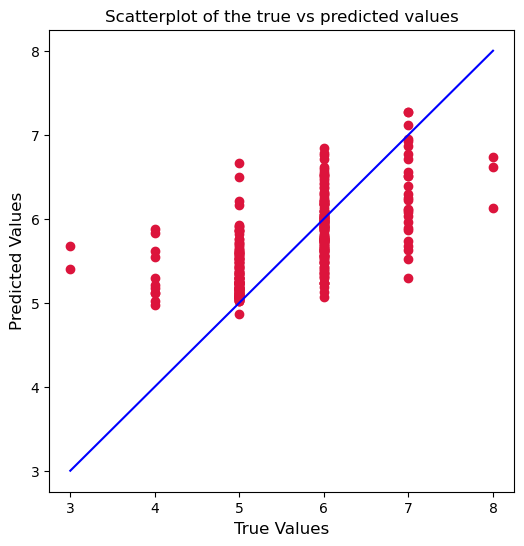

In [219]:
# scatter plot of the true vs predicted values in regression

y_test_ = np.array(y_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test_, y_test_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test_))
p2 = min(min(y_test_pred), min(y_test_))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title("Scatterplot of the true vs predicted values", fontsize=12)
plt.savefig("../figures/Scatterplot of the true vs predicted values.jpg", dpi=300, bbox_inches='tight')
# plt.axis('equal')
plt.show()

In [221]:
from sklearn.inspection import permutation_importance
import matplotlib.pylab as plt

In [222]:
# global feature importance metrics 1: permutation feature importance
# rf


# Calculate the perturbation feature importance values on the test set.
np.random.seed(88)
result = permutation_importance(best_rf, df_test, y_test, n_repeats=10, scoring='neg_root_mean_squared_error')   # r2
scores = result.importances
print("perturbation feature importance values on the test set:")
print(scores)

perturbation feature importance values on the test set:
[[ 3.92773257e-03 -2.09598755e-04  9.15598021e-03  4.90673998e-03
   3.72948243e-03  4.65225308e-03  6.27993448e-03  7.37007280e-03
   2.63930963e-06  8.00528917e-03]
 [ 1.08337904e-01  1.20941180e-01  1.08183946e-01  1.25023177e-01
   1.05055274e-01  1.24144017e-01  8.60446470e-02  1.32286871e-01
   9.10424202e-02  9.92406716e-02]
 [ 8.85310670e-03  7.46000279e-03  9.22095464e-03  3.93035448e-03
   6.24990019e-03  5.32515077e-03  7.42298976e-03  3.88210941e-03
   7.69975018e-03  5.39368044e-03]
 [ 3.13728523e-02  4.73426568e-02  2.38308267e-02  3.84277938e-02
   3.60927462e-02  5.23428337e-02  3.81174169e-02  2.51252060e-02
   2.35996459e-02  2.14470965e-02]
 [ 3.45717431e-03  6.99847977e-03  4.28394506e-03  7.11715382e-03
  -3.83069130e-03  1.38815765e-02 -6.94278471e-03  3.48866138e-03
   1.74781398e-03 -3.97176862e-03]
 [ 2.73146067e-03  8.09304100e-03  9.86330385e-03 -1.27246186e-03
   7.02743319e-03  4.69415139e-03  6.175983

In [792]:
test_score_rf

0.5920095543992512

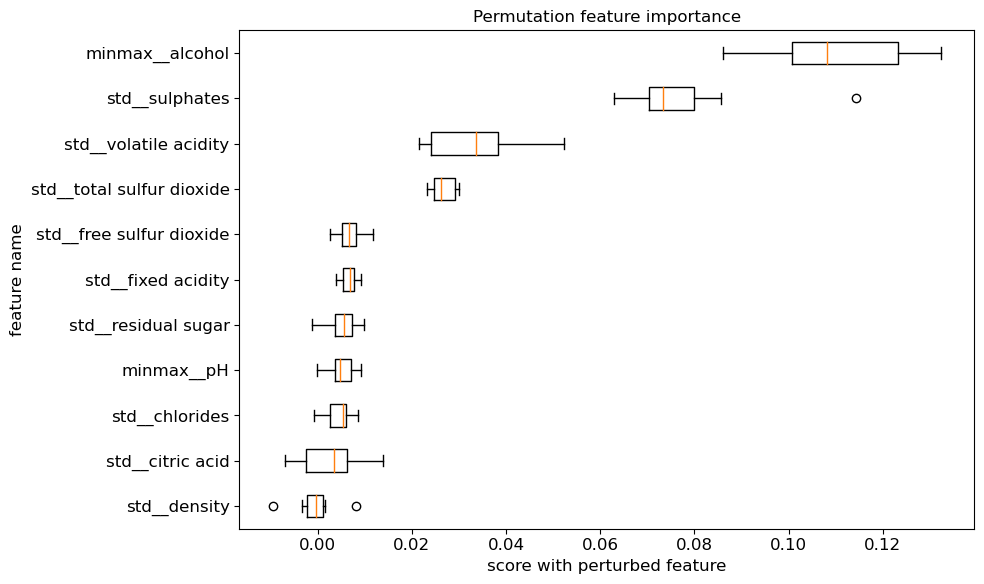

In [225]:
# Visualize the results. 
# This dataset has many features so show only the top 10 most important ones on the figure. 

sorted_indcs = np.argsort(np.mean(scores,axis=1))  #[::-1]   #[:10]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))

plt.boxplot(scores[sorted_indcs].T,labels=feature_names[sorted_indcs],vert=False)
# plt.axvline(test_score_rf,label='test score')
# plt.xscale("logit")    # plt.xscale("symlog")
plt.title("Permutation feature importance", fontsize=12)
plt.xlabel('score with perturbed feature', fontsize=12)
plt.ylabel('feature name', fontsize=12)
# plt.legend()
plt.savefig("../figures/Permutation feature importance.jpg", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [226]:
import shap

In [227]:
# global feature importance metrics 2: shap values
# rf


# Calculate the shap values of the test set points. 

shap.initjs() # required for visualizations later on

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(best_rf)

# calculate shap values on the points in the test
shap_values = explainer.shap_values(df_test)
print("shape of shap_values:", np.shape(shap_values))
print("shap_values:")
print(shap_values)

shape of shap_values: (320, 11)
shap_values:
[[ 0.02392752  0.15512963  0.02007446 ... -0.0682584  -0.06533002
   0.16326966]
 [-0.00250746 -0.13766764  0.01910735 ... -0.04969497  0.00393428
  -0.26686549]
 [ 0.02822585  0.40875637  0.02377067 ...  0.05617782  0.14430611
   0.25777793]
 ...
 [ 0.06786907  0.39838841  0.02818545 ...  0.03379455  0.13054858
  -0.20751496]
 [ 0.01426443 -0.17353338  0.03770988 ... -0.04670466 -0.01514855
  -0.1651902 ]
 [ 0.05751865  0.48368266  0.01048468 ...  0.01585198  0.12776502
  -0.23414711]]


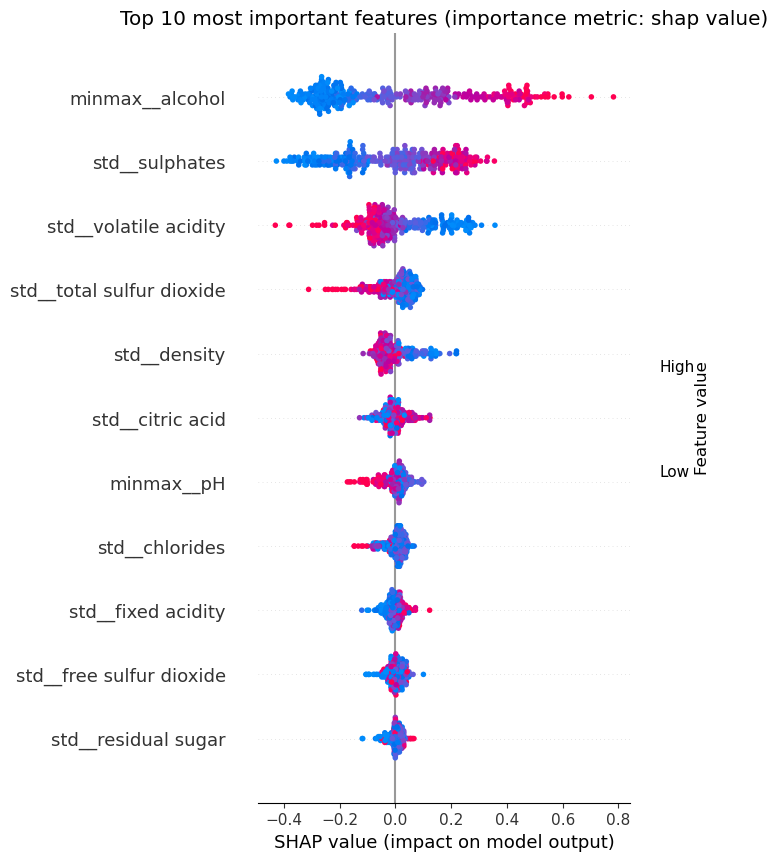

In [228]:
# Use the shap values to calculate global feature importance values 
# and prepare a plot that shows the top 10 most important features. 

shap.summary_plot(shap_values, df_test, feature_names = feature_names, plot_size=[6,10], show=False)  # max_display=10
plt.title("Top 10 most important features (importance metric: shap value)")
plt.show()

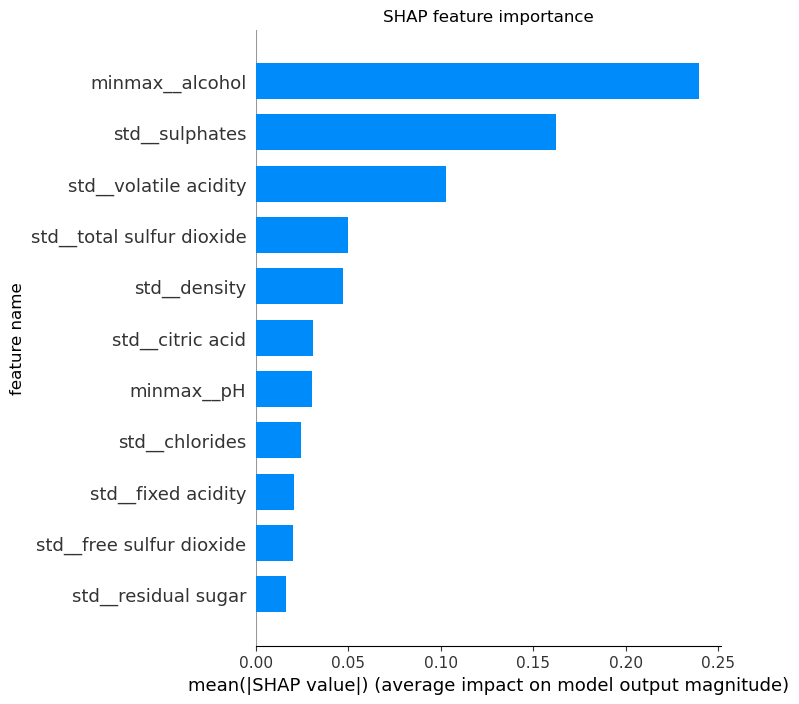

In [229]:
# plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, df_test, feature_names = feature_names,  plot_size=[6,8], plot_type="bar", show=False)  # max_display=10,

plt.rcParams.update({'font.size': 12})
plt.title("SHAP feature importance", fontsize=12)
plt.ylabel('feature name', fontsize=12)
plt.savefig("../figures/SHAP feature importance.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [230]:
# calculate SHAP values for local feature importance

# 用rf

In [231]:
# Let's take a look at some specific data points with indices 0, 100, and 200. 
# For each data point, create a force plot and describe in a paragraph or two which features contribute positively and negatively to the prediction.
    
def topImportantWithIndex(index):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=(10,6))
    indcs = np.argsort(shap_values[index,:])[::-1]
    feature = feature_names[indcs][::-1]
    feature = [a + ": " + str(b) for a,b in zip(feature, np.array(df_test)[index,:][indcs][::-1].round(4))]
    shap = shap_values[index,:][indcs][::-1]

    plt.figure(figsize=(10,6))
    plt.xlabel("SHAP value",fontsize=12)
    plt.ylabel("feature name: feature value",fontsize=12)
    plt.title("Local feature importance (datapoint #%d)" % index, fontsize=12)
    plt.barh(feature, shap)
    filename = "../figures/Local feature importance (datapoint #" + str(index) + ").jpg"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [232]:
# data point with index 5

index = 5 # the index of the point to explain

print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = np.array(df_test)[index,:],feature_names = feature_names, figsize=(100,50))  # show=False, matplotlib=True
# plt.savefig("../figures/12345.png", dpi=300, bbox_inches='tight')
# plt.show()


[5.67264859]


<Figure size 1000x600 with 0 Axes>

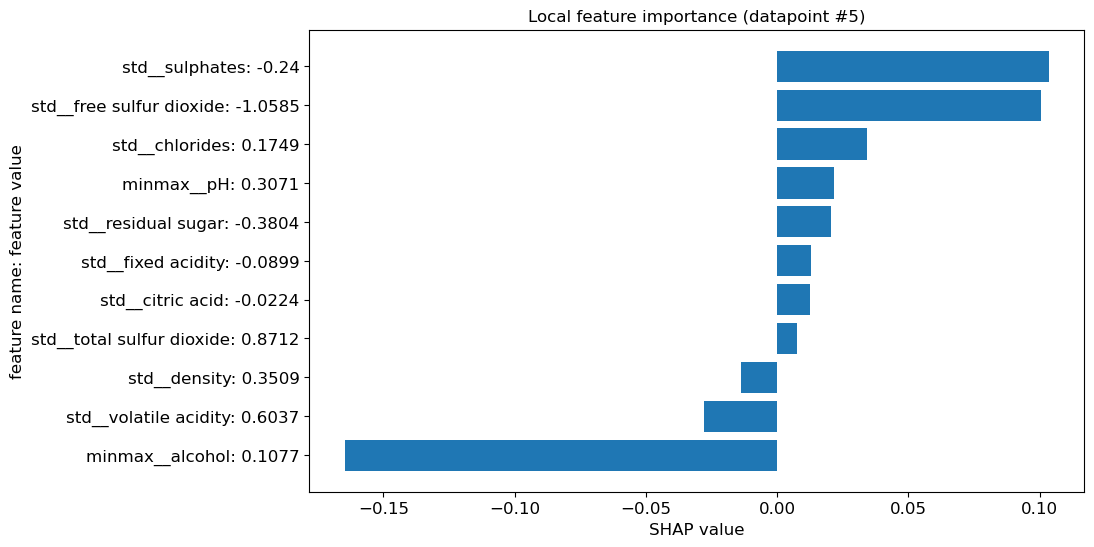

In [233]:
topImportantWithIndex(index)

In [234]:
np.shape(df_test)

(320, 11)

In [235]:
df_test.iloc[5,:]

minmax__pH                   0.307087
minmax__alcohol              0.107692
std__fixed acidity          -0.089868
std__volatile acidity        0.603736
std__citric acid            -0.022350
std__residual sugar         -0.380413
std__chlorides               0.174883
std__free sulfur dioxide    -1.058549
std__total sulfur dioxide    0.871214
std__density                 0.350909
std__sulphates              -0.240015
Name: 5, dtype: float64

In [236]:
y_test_pred[125]

6.31

In [237]:
np.mean(y_test)

quality    5.59375
dtype: float64

In [238]:
explainer.expected_value

array([5.67264859])

In [239]:
# data point with index 125

index = 125 # the index of the point to explain

print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = np.array(df_test)[index,:],feature_names = feature_names, figsize=(100,50))

[5.67264859]


<Figure size 1000x600 with 0 Axes>

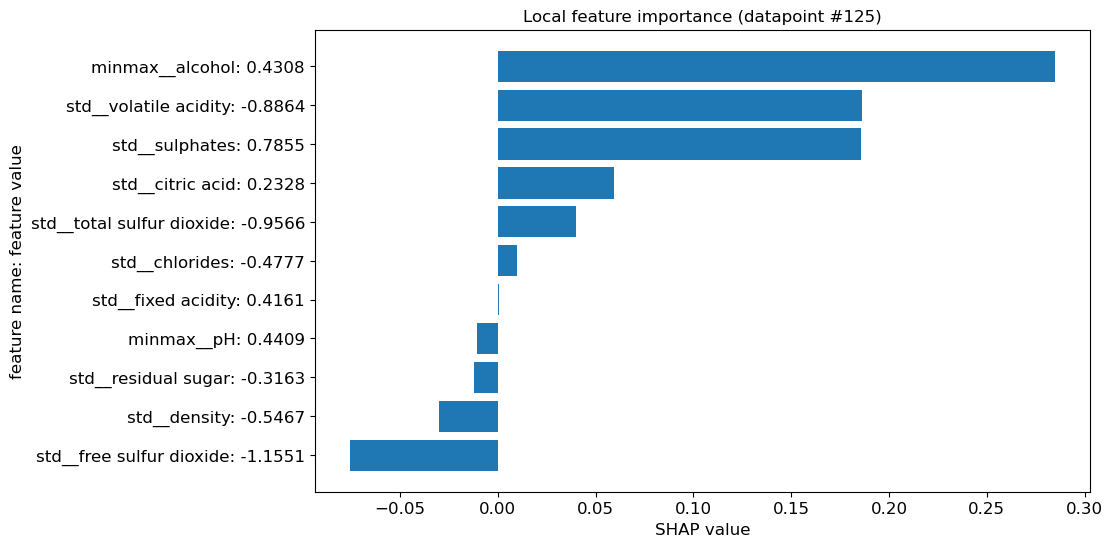

In [240]:
topImportantWithIndex(index)

In [241]:
# data point with index 250

index = 250 # the index of the point to explain

print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = np.array(df_test)[index,:],feature_names = feature_names, figsize=(100,50))

[5.67264859]


<Figure size 1000x600 with 0 Axes>

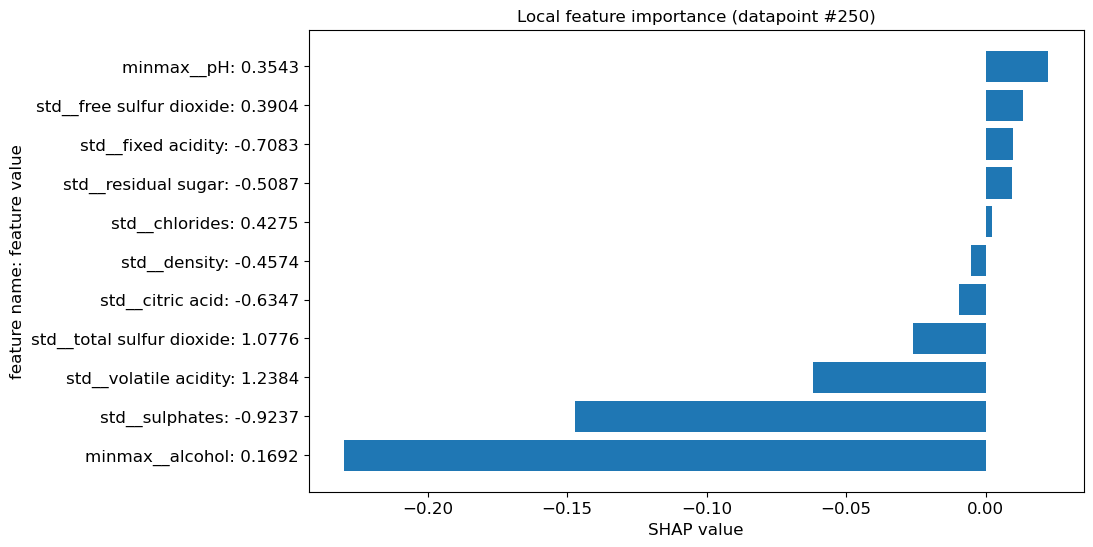

In [242]:
topImportantWithIndex(index)

In [243]:
# get best xgb model and its best parameters

best_param_grid_xgb = {"learning_rate": [0.03],
                       "n_estimators": [10000],
                       "seed": [12345],
                       "reg_alpha": [0.1], 
                       "missing": [np.nan], 
                       "colsample_bytree": [0.9],              
                       "subsample": [0.66]}

best_XGB = xgboost.XGBRegressor()
best_XGB.set_params(**ParameterGrid(best_param_grid_xgb)[0])
best_XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_CV, y_CV)], verbose=False)
y_CV_pred = best_XGB.predict(df_CV)
print('the CV RMSE:',np.sqrt(mean_squared_error(y_CV,y_CV_pred)))
y_test_pred = best_XGB.predict(df_test)
test_score_xgb = np.sqrt(mean_squared_error(y_test,y_test_pred))
print('the test RMSE:',test_score_xgb)
# print('the test R2:',r2_score(y_test,y_test_pred))

the CV RMSE: 0.5914650445025652
the test RMSE: 0.6071538474319151


In [244]:
# global feature importance metrics 3: XGB total_gain metric 

metric_value = best_XGB.get_booster().get_score(importance_type='total_gain')
print("importance metric: total_gain")
metric_value

importance metric: total_gain


{'minmax__pH': 498.7111511230469,
 'minmax__alcohol': 1442.27197265625,
 'std__fixed acidity': 349.9190368652344,
 'std__volatile acidity': 794.7210693359375,
 'std__citric acid': 378.3147277832031,
 'std__residual sugar': 364.2741394042969,
 'std__chlorides': 451.2698059082031,
 'std__free sulfur dioxide': 303.61749267578125,
 'std__total sulfur dioxide': 493.6639099121094,
 'std__density': 425.746337890625,
 'std__sulphates': 739.1663208007812}

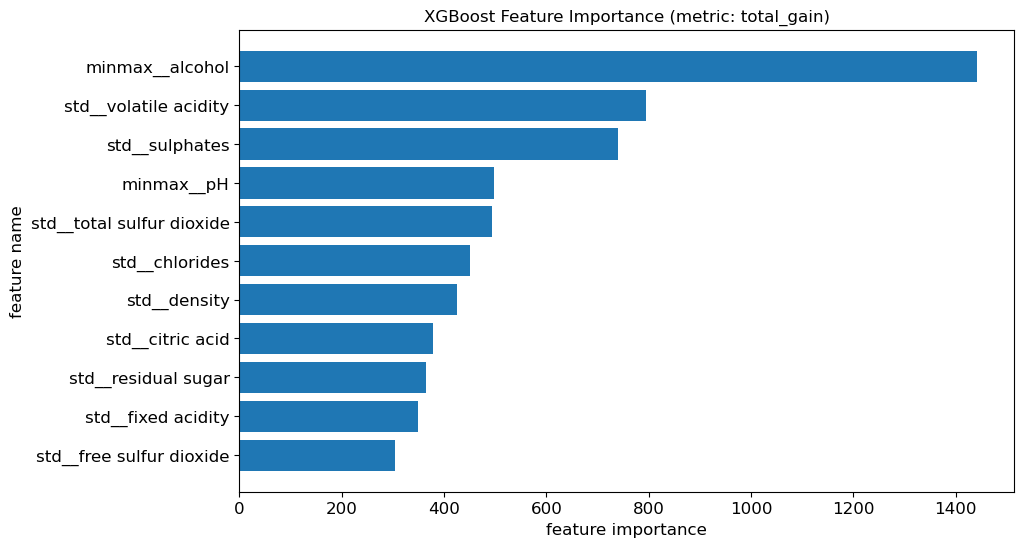

In [245]:
top_features = sorted(metric_value.items(), key=lambda x:x[1], reverse=True)[::-1]
feature, importance = zip(*top_features)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.barh(feature, importance)
plt.xlabel("feature importance", fontsize=12)
plt.ylabel("feature name", fontsize=12)
plt.title("XGBoost Feature Importance (metric: total_gain)", fontsize=12)
# plt.xticks(rotation=90)
plt.savefig("../figures/XGBoost Feature Importance (metric: total_gain).jpg", dpi=300, bbox_inches='tight')
plt.show()

In [591]:
(0.7863040747861778-0.5596373993839454)/0.022042855095797387

10.282999839047523

In [592]:
(0.7863040747861778-0.5686690135130703)/0.01899073617143124

11.460064491891965

In [ ]:
# draft

In [264]:
# save preprocessed data

# fit_transform the whole data set
X_prep_stored = preprocessor.fit_transform(X)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_X_prep_stored = pd.DataFrame(data=X_prep_stored,columns=feature_names)
print(df_X_prep_stored.shape)

df_X_prep_stored.to_csv('../data/preprocessed_data.csv')

(1599, 11)


In [38]:
# X_train_prep.mean(axis=0)

array([ 4.89401676e-01,  3.54576320e-01,  3.88983250e-17,  1.44479493e-16,
        1.68559408e-16, -3.44528021e-16,  3.57494129e-16, -1.40774890e-16,
        8.15012523e-17, -2.97109111e-15,  2.86180534e-16])

In [39]:
# X_val_prep.mean(axis=0)

array([ 0.50449892,  0.36033296, -0.07046817, -0.06720279, -0.01813224,
        0.1184836 , -0.07680919, -0.05679302, -0.02393092, -0.01228178,
       -0.05643961])

In [40]:
# X_test_prep.mean(axis=0)

array([ 0.48898168,  0.38215216,  0.00484719,  0.12003986, -0.01943422,
        0.0851908 ,  0.02202637, -0.01686705, -0.0029873 , -0.01936143,
        0.00165254])

In [41]:
# X_train_prep.std(axis=0)

array([0.13113799, 0.18379667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [42]:
# X_train_prep[:2]

array([[ 3.87931034e-01,  2.85714286e-01,  7.45047271e-01,
        -8.22247545e-01,  1.95716763e-01,  8.83586805e-03,
         1.61380728e-01, -2.54246821e-03,  7.29997919e-02,
         7.87035880e-01,  2.26228264e-01],
       [ 4.82758621e-01,  3.21428571e-01, -7.94568895e-01,
         4.17233643e-01,  1.43637858e-01,  1.65419460e+00,
        -4.04115201e-01,  3.87573854e-01,  1.96131057e+00,
         1.30018230e+00,  2.88996561e+00]])

In [43]:
# X_train[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
389,9.6,0.38,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0
1289,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2


In [44]:
# MinMaxScaler?

In [45]:
# X_train["pH"].max()

3.9

In [46]:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# (3.19-2.74)/(3.9-2.74)


0.3879310344827585

In [47]:
# StandardScaler?

In [48]:
# z = (x - u) / s

# X_train["fixed acidity"].mean()

8.341814389989572

In [49]:
# X_train["fixed acidity"].std()

1.689613747834089

In [50]:
# (7.0-8.341814389989572)/1.689613747834089

-0.7941545170957803

In [435]:
# global feature importance metrics 1: permutation feature importance
# xgb


# Calculate the perturbation feature importance values on the test set.
np.random.seed(88)
result = permutation_importance(best_XGB, df_test, y_test, n_repeats=10, scoring='neg_root_mean_squared_error')   # r2
scores = result.importances
print("perturbation feature importance values on the test set:")
print(scores)

perturbation feature importance values on the test set:
[[ 0.01421636  0.00239467  0.01728013  0.00876652  0.01343176  0.01454726
   0.0087701   0.02080063  0.01320093  0.01677915]
 [ 0.11905872  0.14045614  0.10984864  0.13588096  0.11187181  0.13876564
   0.09401147  0.13278834  0.1008763   0.10748611]
 [ 0.01780004  0.00068496  0.00461521  0.00415197  0.00720958  0.00221824
   0.01111182  0.00607675 -0.00042538  0.00917589]
 [ 0.03483738  0.04729885  0.02439053  0.04813617  0.03338148  0.05217397
   0.03875977  0.02740344  0.02841233  0.02351697]
 [ 0.00243135  0.00033695  0.00562477  0.00872167  0.00117865  0.00502838
  -0.00500847  0.00275947  0.00074917  0.00413035]
 [ 0.01075376  0.00500873  0.01491406  0.0024171   0.00763823  0.00693473
   0.00889964  0.00539055  0.00596903  0.00530864]
 [ 0.01160777  0.00317929  0.00960858  0.00812632  0.00850952  0.01028623
   0.00840541  0.00557836  0.00725309  0.00449715]
 [ 0.00562695  0.0045035   0.0007804   0.00624757  0.00393732  0.0116

In [436]:
test_score_xgb

0.6071538474319151

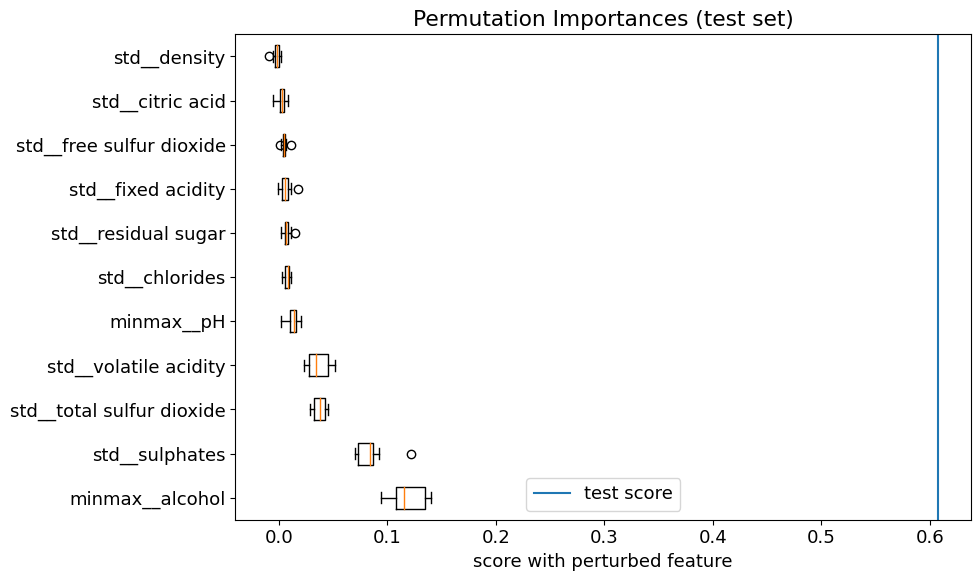

In [439]:
# Visualize the results. 
# This dataset has many features so show only the top 10 most important ones on the figure. 

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]   #[:10]

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(10,6))

plt.boxplot(scores[sorted_indcs].T,labels=feature_names[sorted_indcs],vert=False)
plt.axvline(test_score_xgb,label='test score')
# plt.xscale("logit")    # plt.xscale("symlog")
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

In [447]:
# global feature importance metrics 2: shap values
# xgb

import shap

# Calculate the shap values of the test set points. 

shap.initjs() # required for visualizations later on

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(best_XGB)

# calculate shap values on the points in the test
shap_values = explainer.shap_values(df_test)
print("shape of shap_values:", np.shape(shap_values))
print("shap_values:")
print(shap_values)

shape of shap_values: (320, 11)
shap_values:
[[ 6.15500733e-02  1.16665214e-01 -6.47277087e-02 ... -1.12302467e-01
  -8.10227394e-02  1.99244276e-01]
 [-1.38643919e-03 -1.85650736e-01  1.97363961e-02 ... -1.11993916e-01
   6.94327503e-02 -2.23449722e-01]
 [ 2.48169713e-02  4.87716705e-01 -4.71937889e-03 ...  8.39471444e-02
   6.46228492e-02  3.09369594e-01]
 ...
 [ 7.08303452e-02  3.97815228e-01 -4.14413575e-04 ...  8.98812041e-02
   2.00553169e-03 -2.59936988e-01]
 [-5.52567188e-03 -2.12604150e-01  4.81955819e-02 ... -7.48162642e-02
  -2.94188280e-02 -1.83513924e-01]
 [ 8.30381885e-02  5.68795323e-01  2.30427347e-02 ...  1.33637771e-01
   5.48489615e-02 -2.23867670e-01]]


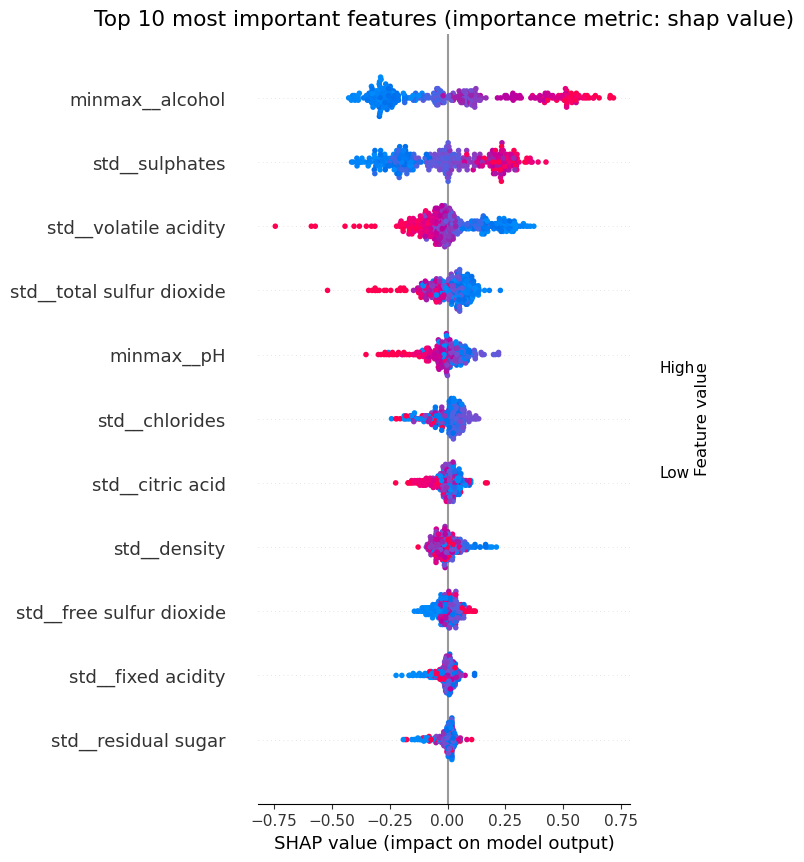

In [448]:
# Use the shap values to calculate global feature importance values 
# and prepare a plot that shows the top 10 most important features. 

shap.summary_plot(shap_values, df_test, feature_names = feature_names, plot_size=[6,10], show=False)  # max_display=10
plt.title("Top 10 most important features (importance metric: shap value)")
plt.show()

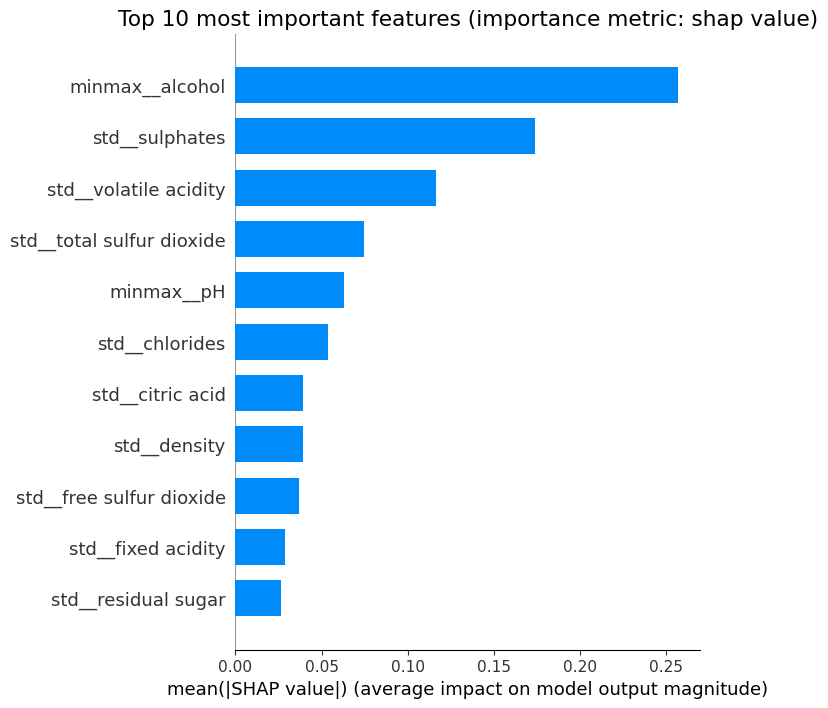

In [449]:
shap.summary_plot(shap_values, df_test, feature_names = feature_names,  plot_size=[6,8], plot_type="bar", show=False)  # max_display=10,
plt.title("Top 10 most important features (importance metric: shap value)")
plt.show()